In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.ticker as mtick


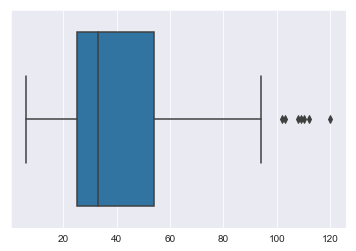

In [25]:
business = [23,24,23,25,27,21,24,15,24,25,25,25,25,25,30,31,41,50,23,19,18,32,27,28,28,28,31,34,29,29,29, \
            42,43,51,6,32,33,37,19,15,21,22,23,25,24,24,24,23,22,21,26,28,28,31,31,31,31,31,31,31,32,32,33,34, \
           35,35,35,35,45,42,42,42,42,42,43,43,43,43,21,21,21,22,23,23,23,23,54,54,54,45,46,47,47,47,47,81,82,77, \
           110,112,91,94,81,67,65,45,65,77,72,73,75,109,108,120,66,94,12,89,88,102,103,88,86,87,88,90,91]
sns.boxplot(business)

business_df = pd.DataFrame()
business_df['days'] = business
business_df['type'] = 'Business'


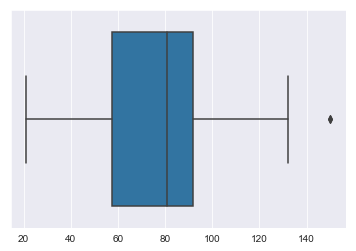

In [26]:
leisure = [90,89,91,93,100,120,110,101,90,90,90,91,92,92,92,92,76,31,76,76,76,76,81,81,81,81,99,99,45,52,53,59,72,61, \
          150,131,132,122,99,93,104,105,31,31,32,34,43,43,43,45,81,77,77,78,86,86,86,86,86,84,76,65,65,65,32,51,67, \
          76,43,43,43,21, 90,89,91,93,100,120,110,101,90,90,90,91,92,92,92,92,76,31,76,76,76,76,81,81,81,81,99,99,45,52,53,59,72,61, \
          150,131,132,122,99,93,104,105,31,31,32,34,43,43,43,45,81,77,77,78,86,86,86,86,86,84,76,65,65,65,32,51,67, \
          76,43,43,43,21]

sns.boxplot(leisure)

leisure_df = pd.DataFrame()
leisure_df['days'] = leisure
leisure_df['type'] = 'Leisure'


Text(0, 0.5, 'Days since Last Booking')

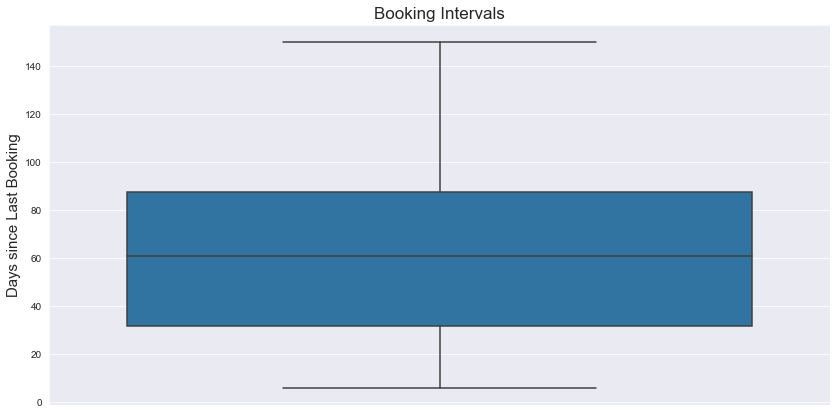

In [27]:
sns.set_style("darkgrid")

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

days_df = pd.concat([leisure_df, business_df])
ax=sns.boxplot(y='days', data=days_df)
# ax = sns.distplot(days_df['days'])
ax.set_title('Booking Intervals',fontsize=17)
ax.set_ylabel('Days since Last Booking',fontsize=15)



87.5
99.0


,type,churned_overall,days,perc
3,Leisure,True,20,13.888889
1,Business,True,7,5.511811


Text(0.5, 0, 'User Type')

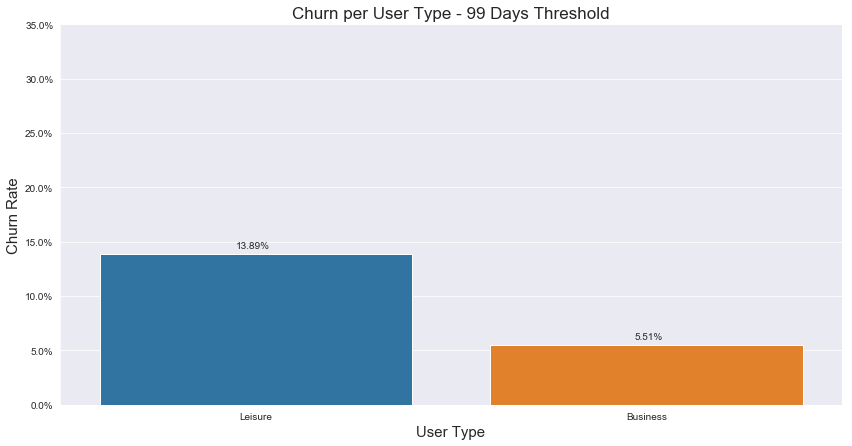

In [31]:
threshold_perc = 90
churn_threshold = np.percentile(days_df['days'],threshold_perc)
print(np.percentile(days_df['days'],75))
print(churn_threshold)

days_df['churned_overall'] = days_df['days'] > churn_threshold

churn_df = days_df.groupby(['type', 'churned_overall']).count()
churn_df['perc'] = churn_df.groupby(['type']).apply(lambda x: x/x.sum() * 100)
churn_df = churn_df.reset_index()
churn_df = churn_df[churn_df['churned_overall'] == True]
churn_df = churn_df.sort_values('type',ascending=False)
display(churn_df)

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax=sns.barplot(y='perc', x='type', data=churn_df)
ax.set(ylim=[0,35])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

x=-0.05
for index, row in churn_df.iterrows():
    ax.text(x, row['perc']+0.5, str(round(row['perc'],2)) + '%')
    x=0.97

ax.set_title(f'''Churn per User Type - {int(round(churn_threshold))} Days Threshold''',fontsize=17)
ax.set_ylabel('Churn Rate',fontsize=15)
ax.set_xlabel('User Type',fontsize=15)


Text(0.5, 0, 'User Type')

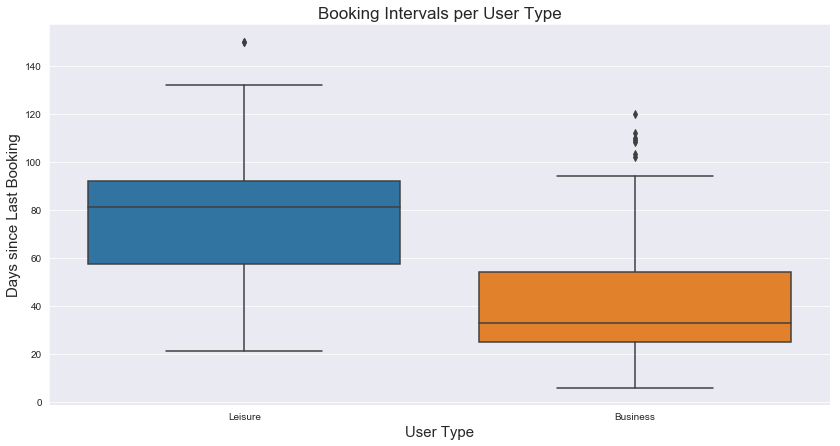

In [29]:
sns.set_style("darkgrid")

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

days_df = pd.concat([leisure_df, business_df])
ax=sns.boxplot(y='days', x='type', data=days_df)

ax.set_title('Booking Intervals per User Type',fontsize=17)
ax.set_ylabel('Days since Last Booking',fontsize=15)
ax.set_xlabel('User Type',fontsize=15)



104.0
88.4


,type,churned_types,days,perc
3,Leisure,True,14,9.722222
1,Business,True,13,10.236220


Text(0.5, 0, 'User Type')

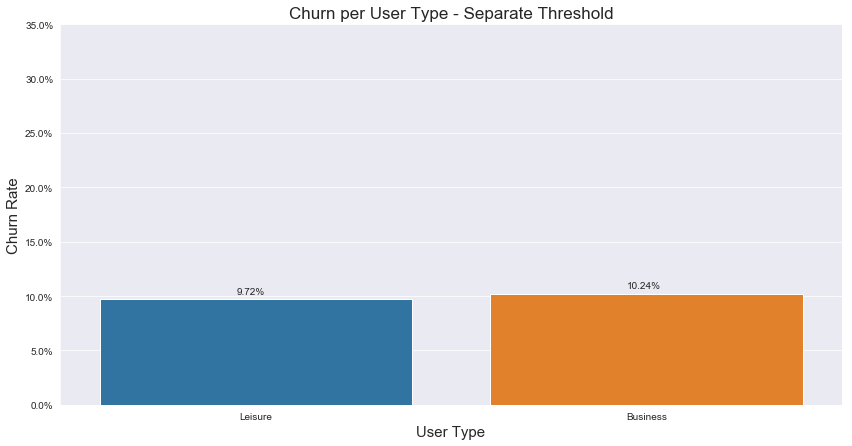

In [30]:
churn_threshold_leisure = np.percentile(days_df[days_df['type'] == 'Leisure']['days'],threshold_perc)
print(churn_threshold_leisure)
churn_threshold_business = np.percentile(days_df[days_df['type'] == 'Business']['days'],threshold_perc)
print(churn_threshold_business)

churn_types_df = days_df.copy()
churn_types_df['churned_types'] = churn_types_df.apply(lambda x: x['days'] > churn_threshold_leisure if x['type'] == 'Leisure' else x['days'] > churn_threshold_business, axis=1)

churn_types_df = churn_types_df.groupby(['type', 'churned_types']).count()
churn_types_df['perc'] = churn_types_df.groupby(['type']).apply(lambda x: (x/x.sum()) * 100)
churn_types_df = churn_types_df.reset_index()
churn_types_df = churn_types_df[churn_types_df['churned_types'] == True]
churn_types_df = churn_types_df.sort_values('type',ascending=False)
display(churn_types_df)

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax=sns.barplot(y='perc', x='type', data=churn_types_df)

x=-0.05
for index, row in churn_types_df.iterrows():
    ax.text(x, row['perc']+0.5, str(round(row['perc'],2)) + '%')
    x=0.95
    
ax.set(ylim=[0,35])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Churn per User Type - Separate Threshold',fontsize=17)
ax.set_ylabel('Churn Rate',fontsize=15)
ax.set_xlabel('User Type',fontsize=15)
